In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings; warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf

In [4]:
import numpy as np

In [5]:
import cv2

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from configs import CONFIG_MAP



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [7]:
from trained_model import TrainedModel

In [8]:
from image_vae import Autoencoder

In [9]:
from pathlib import Path

In [10]:
from magenta.music import sequence_proto_to_midi_file

In [56]:
from magenta.music.notebook_utils import play_sequence, plot_sequence

In [68]:
from magenta.scripts.convert_dir_to_note_sequences import convert_midi

In [11]:
config = CONFIG_MAP['cat-mel_2bar_small']

In [12]:
checkpoint_dir = '../../checkpoints8/train'

In [13]:
tf.reset_default_graph()

In [43]:
model = TrainedModel(config, 16, checkpoint_dir)

INFO:tensorflow:Building MusicVAE model with BidirectionalLstmEncoder, CategoricalLstmDecoder, and hparams:
{'max_seq_len': 32, 'z_size': 256, 'free_bits': 0, 'max_beta': 0.2, 'beta_rate': 0.99999, 'batch_size': 16, 'grad_clip': 1.0, 'clip_mode': 'global_norm', 'grad_norm_clip_to_zero': 10000, 'learning_rate': 0.001, 'decay_rate': 0.9999, 'min_learning_rate': 1e-05, 'conditional': True, 'dec_rnn_size': [256, 256], 'enc_rnn_size': [512], 'dropout_keep_prob': 1.0, 'sampling_schedule': 'inverse_sigmoid', 'sampling_rate': 1000, 'use_cudnn': False, 'residual_encoder': False, 'residual_decoder': False, 'image_batch_size': 16}
yayayayaya
INFO:tensorflow:
Encoder Cells (bidirectional):
  units: [512]

INFO:tensorflow:
Decoder Cells:
  units: [256, 256]

rararara <magenta.models.music_vae.lstm_models.BidirectionalLstmEncoder object at 0x7fce056b9438>
oooooooo
INFO:tensorflow:Restoring parameters from ../../checkpoints8/train/model.ckpt-3180


In [15]:
IMG_PATH = Path('../../GAPED/GAPED/Sn_j/')

In [16]:
images = list(map(str, IMG_PATH.glob('*.jpg')))[:5]

In [17]:
images

['../../GAPED/GAPED/Sn_j/Sn001.jpg',
 '../../GAPED/GAPED/Sn_j/Sn002.jpg',
 '../../GAPED/GAPED/Sn_j/Sn003.jpg',
 '../../GAPED/GAPED/Sn_j/Sn004.jpg',
 '../../GAPED/GAPED/Sn_j/Sn005.jpg']

In [18]:
def decode_img(path):
    img = cv2.imread(path)
    img = np.asarray(img).astype(np.float32) / 255.
    img = cv2.resize(img, (64, 64))
    return img

In [19]:
img = [decode_img(path) for path in images]

In [20]:
img = np.stack(img, axis=0)

In [21]:
img.shape, img.dtype

((5, 64, 64, 3), dtype('float32'))

In [30]:
z = model.encode_images(img)

In [31]:
ns = model.decode(z, length=config.hparams.max_seq_len)

In [32]:
for i, n in enumerate(ns):
    sequence_proto_to_midi_file(n, f'generated_{i}.mid')

In [44]:
v = model.encode_music_shared(ns)

In [45]:
v.shape

(5, 256)

In [46]:
imgs = model.decode_imgs(v)

In [47]:
imgs.shape

(5, 64, 64, 3)

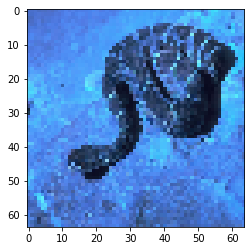

In [50]:
plt.imshow(img[0])

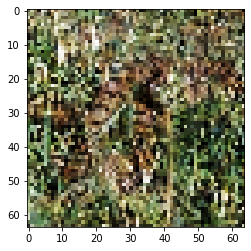

In [55]:
plt.imshow(imgs[4])

In [67]:
plot_sequence(ns[0])

Loading BokehJS ...

In [142]:
ns1 = convert_midi('', '', '../../../../clean_midi/Metallica/For Whom the Bell Tolls.mid')

INFO:tensorflow:Converted MIDI file ../../../../clean_midi/Metallica/For Whom the Bell Tolls.mid.


In [143]:
tensors = config.data_converter.to_tensors(ns1)
print(len(tensors))
ns1_extracted = [config.data_converter.to_notesequences(tensors[0]) for i in range(len(tensors))]

4


In [144]:
len(ns1_extracted[0])

5

In [145]:
v1 = model.encode_music_shared(ns1_extracted[0])

In [146]:
imgs1 = model.decode_imgs(v1)

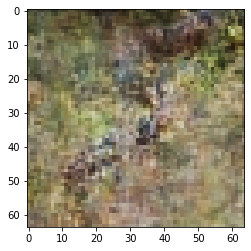

In [156]:
plt.imshow(imgs1[1])